# Import Libraries

In [118]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Declare the tickers, start and end date

In [119]:
tickers=['SPY', 'BND', 'GLD', 'QQQ', 'VTI']
enddate=dt.datetime.today()
startdate=enddate-dt.timedelta(days=5*365)

# Download all tickers data

In [120]:
close_df=pd.DataFrame()
data=yf.download(tickers, start=startdate, end=enddate)

C:\Users\reezw\AppData\Local\Temp\ipykernel_23568\3242884116.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(tickers, start=startdate, end=enddate)
[*********************100%***********************]  5 of 5 completed


In [121]:
data

Price           Close                                                  \
Ticker            BND         GLD         QQQ         SPY         VTI   
Date                                                                    
2020-12-04  75.458366  172.320007  296.330048  344.796661  178.255157   
2020-12-07  75.561417  174.889999  298.007935  344.088074  178.059692   
2020-12-08  75.587158  175.500000  299.016754  345.095001  178.832230   
2020-12-09  75.458366  172.500000  292.246643  341.999847  177.073059   
2020-12-10  75.612915  172.169998  293.420349  341.888000  177.333694   
...               ...         ...         ...         ...         ...   
2025-11-25  74.580872  380.079987  608.890015  675.020020  332.160004   
2025-11-26  74.660614  383.119995  614.270020  679.679993  334.440002   
2025-11-28  74.541000  387.880005  619.250000  683.390015  336.309998   
2025-12-01  74.250000  389.750000  617.169983  680.270020  334.660004   
2025-12-02  74.320099  386.100006  622.289978  681.799988  335.394501   

Price            High                                                  ...  \
Ticker            BND         GLD         QQQ         SPY         VTI  ...   
Date                                                                   ...   
2020-12-04  75.587174  173.320007  296.475559  344.796661  178.255157  ...   
2020-12-07  75.630118  175.289993  298.376509  344.582171  178.245847  ...   
2020-12-08  75.707389  175.929993  299.317427  345.663667  179.074229  ...   
2020-12-09  75.501300  174.039993  299.084568  345.915325  179.306944  ...   
2020-12-10  75.655849  173.580002  294.545460  342.941431  177.696701  ...   
...               ...         ...         ...         ...         ...  ...   
2025-11-25  74.650648  382.519989  610.260010  676.210022  332.660004  ...   
2025-11-26  74.660614  383.779999  616.190002  681.700012  335.489990  ...   
2025-11-28  74.640679  388.000000  619.320007  683.669983  336.420013  ...   
2025-12-01  74.300003  390.700012  619.440002  682.989990  336.100006  ...   
2025-12-02  74.334999  388.980011  623.750000  683.820007  336.359985  ...   

Price            Open                                                  \
Ticker            BND         GLD         QQQ         SPY         VTI   
Date                                                                    
2020-12-04  75.570002  172.779999  295.175840  342.438043  176.849673   
2020-12-07  75.552834  172.559998  296.514249  344.022809  178.059692   
2020-12-08  75.698800  175.509995  297.532777  342.810951  177.445351   
2020-12-09  75.475539  173.919998  298.803313  345.756857  179.213859   
2020-12-10  75.535624  172.899994  290.209915  340.620111  176.226055   
...               ...         ...         ...         ...         ...   
2025-11-25  74.461252  380.260010  603.510010  668.630005  328.640015   
2025-11-26  74.540995  381.059998  612.510010  677.630005  333.320007   
2025-11-28  74.620747  385.980011  616.109985  680.859985  335.399994   
2025-12-01  74.269997  390.609985  613.630005  678.809998  333.959991   
2025-12-02  74.250000  388.869995  619.460022  681.919983  335.649994   

Price        Volume                                         
Ticker          BND       GLD       QQQ       SPY      VTI  
Date                                                        
2020-12-04  4880200  10098600  19332100  50749900  4401400  
2020-12-07  4734800  10555100  20851000  48944300  4319700  
2020-12-08  3737300   6348400  18341500  42458900  3449000  
2020-12-09  5163900  10743200  48839300  74098300  4470500  
2020-12-10  4731400   6564000  27519500  57735400  3223500  
...             ...       ...       ...       ...      ...  
2025-11-25  7446200  10462800  57560900  81077100  3654300  
2025-11-26  7327100   9184100  42393600  71879600  2745500  
2025-11-28  4812100   7175400  23034400  49212000  2288300  
2025-12-01  6891500  11177100  40957600  61201200  4270600  
2025-12-02  4786209   6026504  39992502  36859349  2082507  

[1254 

# Extract the close price into close_df Dataframe

In [122]:
close_df=data['Close']

In [123]:
close_df

Ticker,BND,GLD,QQQ,SPY,VTI
Date,,,,,
2020-12-04,75.458366,172.320007,296.330048,344.796661,178.255157
2020-12-07,75.561417,174.889999,298.007935,344.088074,178.059692
2020-12-08,75.587158,175.500000,299.016754,345.095001,178.832230
2020-12-09,75.458366,172.500000,292.246643,341.999847,177.073059
2020-12-10,75.612915,172.169998,293.420349,341.888000,177.333694
...,...,...,...,...,...
2025-11-25,74.580872,380.079987,608.890015,675.020020,332.160004
2025-11-26,74.660614,383.119995,614.270020,679.679993,334.440002
2025-11-28,74.541000,387.880005,619.250000,683.390015,336.309998


# Compute log returns

In [124]:
log_returns=np.log(close_df/close_df.shift(1))

In [125]:
log_returns=log_returns.dropna()
log_returns

Ticker,BND,GLD,QQQ,SPY,VTI
Date,,,,,
2020-12-07,0.001365,0.014804,0.005646,-0.002057,-0.001097
2020-12-08,0.000341,0.003482,0.003379,0.002922,0.004329
2020-12-09,-0.001705,-0.017242,-0.022901,-0.009009,-0.009886
2020-12-10,0.002046,-0.001915,0.004008,-0.000327,0.001471
2020-12-11,0.001589,0.001857,-0.002217,-0.001173,-0.001786
...,...,...,...,...,...
2025-11-25,0.002275,-0.000316,0.006145,0.009362,0.010654
2025-11-26,0.001069,0.007967,0.008797,0.006880,0.006841
2025-11-28,-0.001603,0.012348,0.008074,0.005444,0.005576


# Annualized covariance matrix

In [126]:
cov_matrix=log_returns.cov()*252
cov_matrix

Ticker,BND,GLD,QQQ,SPY,VTI
Ticker,,,,,
BND,0.003605,0.003109,0.002604,0.001923,0.002022
GLD,0.003109,0.024147,0.003968,0.003284,0.003459
QQQ,0.002604,0.003968,0.051305,0.036613,0.037320
SPY,0.001923,0.003284,0.036613,0.029223,0.029738
VTI,0.002022,0.003459,0.037320,0.029738,0.030578


# Define functions-standard_deviation, expected_return, sharpe_ratio

In [127]:
def standard_deviation(weights, cov_matrix):
    variance=weights.T@ cov_matrix @weights
    return np.sqrt(variance)
def expected_return(weights, log_returns):
    return np.sum(log_returns.mean()*weights)*252

def sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate):
    return (expected_return(weights, log_returns)-risk_free_rate)/standard_deviation(weights, cov_matrix)

# Risk-free rate (annual, in decimal)

In [128]:
risk_free_rate=0.05

# Define negative sharpe ratio function

In [129]:
def neg_sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate):
    return -sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate)

# Constraints and bounds
### Sum of weights must be 1
### Bounds for each weight, for example between 0.15 and 0.4

In [130]:
constraints={'type':'eq', 'fun': lambda weights:np.sum(weights)-1}
bounds=[(0.1, 0.4) for  _ in range(len(tickers))]

### Take initial weights as the same for all tickers/assets

In [131]:
initial_weights=np.array([1/len(tickers)]*len(tickers))
initial_weights
                         

array([0.2, 0.2, 0.2, 0.2, 0.2])

# Optimization

In [132]:
optimized_result=minimize(
    neg_sharpe_ratio,
    initial_weights,
    args=(log_returns, cov_matrix, risk_free_rate),
    method='SLSQP',
    constraints=constraints,
    bounds=bounds)


# Check if optimization succeeded

In [133]:
print("Success:", optimized_result.success)
print("Message:", optimized_result.message)

Success: True
Message: Optimization terminated successfully


In [134]:
optimal_weights=optimized_result.x
optimal_weights

array([0.1, 0.4, 0.1, 0.3, 0.1])

In [135]:
for t, w in zip(tickers, optimal_weights):
    print(f"{t}: {w:4f}")

SPY: 0.100000
BND: 0.400000
GLD: 0.100000
QQQ: 0.300000
VTI: 0.100000


In [136]:
obj=optimized_result.fun
obj

-0.7067059566243074

# Portfolio stats

In [137]:
optimal_portfolio_return=expected_return(optimal_weights, log_returns)
optimal_portfolio_volatility=standard_deviation(optimal_weights, cov_matrix)
optimal_portfolio_sharpe_ratio=sharpe_ratio(optimal_weights, log_returns, cov_matrix, risk_free_rate)

In [138]:
print(f" Expected annual Return: {optimal_portfolio_return:.4f}")
print(f" Expected Volatility: {optimal_portfolio_volatility:.4f}")
print(f" Expected Portfolio Sharpe Ratio: {optimal_portfolio_sharpe_ratio:.4f}")

 Expected annual Return: 0.1334
 Expected Volatility: 0.1180
 Expected Portfolio Sharpe Ratio: 0.7067


# Plot weights

Text(0.5, 1.0, 'Portfolio Optimization using mean variance approach')

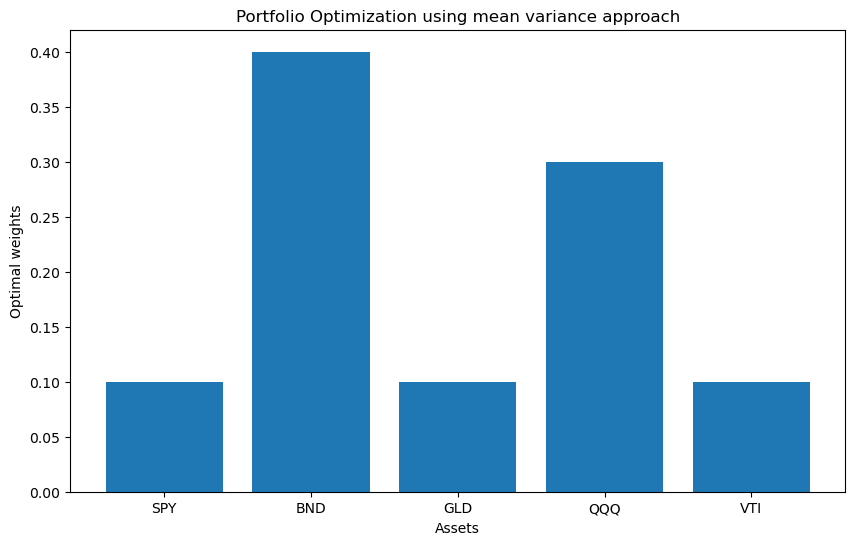

In [139]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(tickers, optimal_weights)
plt.xlabel("Assets")
plt.ylabel("Optimal weights")
plt.title("Portfolio Optimization using mean variance approach")